<a href="https://colab.research.google.com/github/BhagyaRekhaSunkavalli/AI-ML/blob/main/AI_Ml_Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [8]:
X = df.iloc[:, [3, 4]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

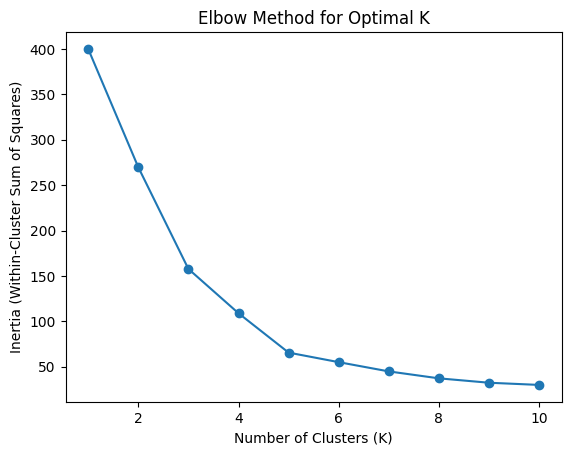

In [13]:
inertia_values = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(K_values, inertia_values, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)


Silhouette Score: 0.55


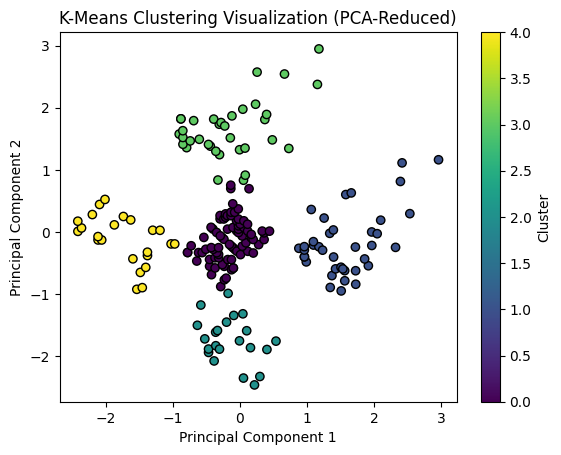

In [14]:
df["Cluster"] = cluster_labels
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="viridis", marker="o", edgecolors="black")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization (PCA-Reduced)")
plt.colorbar(label="Cluster")
plt.show()